In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
#bring in data
human_df = pd.read_csv("../Data/human-development-index.csv")
happiness = pd.read_csv("../Data/happiness-cantril-ladder.csv")

cancer_death = pd.read_csv("../Data/cancer-death-rates.csv")
cancer_incidence = pd.read_csv("../Data/cancer-incidence.csv")
dalys = pd.read_csv("../Data/dalys-rate-from-all-causes.csv")
life_exp = pd.read_csv("../Data/life-expectancy.csv")
mental_health = pd.read_csv("../Data/mental-health-share-of-total-disease-burden.csv")
air_pollution = pd.read_csv("../Data/death-rate-by-source-from-air-pollution.csv")
vac_prev_death = pd.read_csv("../Data/deaths-caused-by-vaccine-preventable-diseases.csv")
health_ins_cov = pd.read_csv("../Data/health-insurance-coverage-in-the-us.csv")
death_risk = pd.read_csv("../Data/number-of-deaths-by-risk-factor.csv")
suicide = pd.read_csv("../Data/suicide-death-rates.csv")
inf_disease = pd.read_csv("../Data/the-number-of-cases-of-infectious-diseases.csv")
gdp = pd.read_csv("../Data/maddison-data-gdp-per-capita-in-2011us-single-benchmark.csv")
co2 = pd.read_csv("../Data/annual-co2-emissions-per-country.csv")
child_mort = pd.read_csv("../Data/child-mortality-igme.csv")
malnutrition = pd.read_csv("../Data/malnutrition-death-rates.csv")

# Clean and Transform Data
Filter for the Country (maybe the year as well)<br>
Sort values for readability <br>
Insert the 'start_value' column, to get the 'score' calculation <br>
The 'score' value represents change from the 'start_value'. Calculated by subtracting the current value from the 'start_value'.<br>
Reduce columns <br>

In [3]:
#filter and clean the hdi data
human_df_clean = human_df[(human_df['Code'] == 'USA')&(human_df['Year'] >= 2006)&(human_df['Year'] < 2018)]
human_df_clean = human_df_clean.sort_values(['Year'], ascending = (True))
#human_df_clean.insert(4, 'start_value_human', 0.901)
human_df_clean['start_value_human'] = (human_df_clean['Human Development Index (UNDP)'].shift(1))
human_df_clean['score_human'] = round((human_df_clean['Human Development Index (UNDP)'] / human_df_clean['start_value_human'])-1,4)
human_df_clean = human_df_clean[['Entity', 'Year','score_human']]
human_df_clean

,Entity,Year,score_human
4780,United States,2006,NaN
4781,United States,2007,0.0044
4782,United States,2008,0.0055
4783,United States,2009,0.0000
4784,United States,2010,0.0044
4785,United States,2011,0.0033
4786,United States,2012,0.0011
4787,United States,2013,-0.0022
4788,United States,2014,0.0022
4789,United States,2015,0.0022


In [4]:
#filter and clean happiness data
happiness_clean = happiness[(happiness['Code'] == 'USA')&(happiness['Year'] >= 2006)&(happiness['Year'] < 2018)]
happiness_clean = happiness_clean.sort_values(['Year'], ascending = (True))
#happiness_clean.insert(4, 'start_value_h', 7.181794)
happiness_clean['start_value_h'] = (happiness_clean['Life satisfaction in Cantril Ladder (World Happiness Report 2019)'].shift(1))
happiness_clean['score_happy'] = round((happiness_clean['Life satisfaction in Cantril Ladder (World Happiness Report 2019)'] / happiness_clean['start_value_h'])-1,4)
happiness_clean = happiness_clean[['Entity', 'Year','score_happy']]
happiness_clean

,Entity,Year,score_happy
1604,United States,2006,NaN
1605,United States,2007,0.0461
1606,United States,2008,-0.0309
1607,United States,2009,-0.0168
1608,United States,2010,0.0008
1609,United States,2011,-0.0068
1610,United States,2012,-0.0125
1611,United States,2013,0.0317
1612,United States,2014,-0.0135
1613,United States,2015,-0.0402


In [5]:
#filter and clean cancer death data
cancer_death_clean = cancer_death[(cancer_death['Code'] == 'USA')&(cancer_death['Year'] >= 2006)&(cancer_death['Year'] < 2018)]
cancer_death_clean = cancer_death_clean.sort_values(['Year'], ascending = (True))
#cancer_death_clean.insert(4, 'start_value_cd', 139.857968)
cancer_death_clean['start_value_cd'] = (cancer_death_clean['Deaths - Neoplasms - Sex: Both - Age: Age-standardized (Rate)'].shift(1))
cancer_death_clean['score_cd'] = round((cancer_death_clean['Deaths - Neoplasms - Sex: Both - Age: Age-standardized (Rate)'] / cancer_death_clean['start_value_cd'])-1,4)
cancer_death_clean = cancer_death_clean[['Entity', 'Year','score_cd']]
cancer_death_clean

,Entity,Year,score_cd
6092,United States,2006,NaN
6093,United States,2007,-0.0190
6094,United States,2008,-0.0112
6095,United States,2009,-0.0129
6096,United States,2010,-0.0243
6097,United States,2011,-0.0072
6098,United States,2012,-0.0144
6099,United States,2013,-0.0110
6100,United States,2014,-0.0063
6101,United States,2015,-0.0039


In [6]:
#filter and clean cancer incidence data
cancer_incidence_clean = cancer_incidence[(cancer_incidence['Code'] == 'USA')&(cancer_incidence['Year'] >= 2006)&(cancer_incidence['Year'] < 2018)]
cancer_incidence_clean = cancer_incidence_clean.sort_values(['Year'], ascending = (True))
#cancer_incidence_clean.insert(4, 'start_value_ci', 1279.477805)
cancer_incidence_clean['start_value_ci'] = (cancer_incidence_clean['Incidence - Neoplasms - Sex: Both - Age: Age-standardized (Rate)'].shift(1))
cancer_incidence_clean['score_ci'] = round((cancer_incidence_clean['Incidence - Neoplasms - Sex: Both - Age: Age-standardized (Rate)'] / cancer_incidence_clean['start_value_ci'])-1,4)
cancer_incidence_clean = cancer_incidence_clean[['Entity', 'Year','score_ci']]
cancer_incidence_clean

,Entity,Year,score_ci
6092,United States,2006,NaN
6093,United States,2007,-0.0023
6094,United States,2008,0.0000
6095,United States,2009,0.0008
6096,United States,2010,-0.0035
6097,United States,2011,-0.0002
6098,United States,2012,-0.0029
6099,United States,2013,-0.0021
6100,United States,2014,-0.0008
6101,United States,2015,0.0010


In [7]:
#filter and clean dalys data
dalys_clean = dalys[(dalys['Code'] == 'USA')&(dalys['Year'] >= 2006)&(dalys['Year'] < 2018)]
dalys_clean = dalys_clean.sort_values(['Year'], ascending = (True))
#dalys_clean.insert(4, 'start_value_d', 24784.593979)
dalys_clean['start_value_d'] = (dalys_clean['DALYs (Disability-Adjusted Life Years) - All causes - Sex: Both - Age: Age-standardized (Rate)'].shift(1))
dalys_clean['score_d'] = round((dalys_clean['DALYs (Disability-Adjusted Life Years) - All causes - Sex: Both - Age: Age-standardized (Rate)'] / dalys_clean['start_value_d'])-1,4)
dalys_clean = dalys_clean[['Entity', 'Year','score_d']]
dalys_clean

,Entity,Year,score_d
6092,United States,2006,NaN
6093,United States,2007,-0.0111
6094,United States,2008,-0.0092
6095,United States,2009,-0.0096
6096,United States,2010,-0.0138
6097,United States,2011,0.0010
6098,United States,2012,-0.0037
6099,United States,2013,-0.0001
6100,United States,2014,0.0027
6101,United States,2015,0.0078


In [8]:
#filter and clean life exp data
life_exp_clean = life_exp[(life_exp['Code'] == 'USA')&(life_exp['Year'] >= 2006)&(life_exp['Year'] < 2018)]
life_exp_clean = life_exp_clean.sort_values(['Year'], ascending = (True))
#life_exp_clean.insert(4, 'start_value_le', 77.892)
life_exp_clean['start_value_le'] = (life_exp_clean['Life expectancy'].shift(1))
life_exp_clean['score_le'] = round((life_exp_clean['Life expectancy'] / life_exp_clean['start_value_le'])-1,4)
life_exp_clean = life_exp_clean[['Entity', 'Year','score_le']]
life_exp_clean

,Entity,Year,score_le
18087,United States,2006,NaN
18088,United States,2007,0.0027
18089,United States,2008,0.0026
18090,United States,2009,0.0024
18091,United States,2010,0.0021
18092,United States,2011,0.0016
18093,United States,2012,0.0011
18094,United States,2013,0.0006
18095,United States,2014,0.0002
18096,United States,2015,-0.0002


In [9]:
#filter and clean mental health data
mental_health_clean = mental_health[(mental_health['Code'] == 'USA')&(mental_health['Year'] >= 2006)&(mental_health['Year'] < 2018)]
mental_health_clean = mental_health_clean.sort_values(['Year'], ascending = (True))
#mental_health_clean.insert(4, 'start_value_mh', 8.112356)
mental_health_clean['start_value_mh'] = (mental_health_clean['DALYs (Disability-Adjusted Life Years) - Mental health disorders (Age-standardized percent)'].shift(1))
mental_health_clean['score_mh'] = round((mental_health_clean['DALYs (Disability-Adjusted Life Years) - Mental health disorders (Age-standardized percent)'] / mental_health_clean['start_value_mh'])-1,4)
mental_health_clean = mental_health_clean[['Entity', 'Year','score_mh']]
mental_health_clean

,Entity,Year,score_mh
5794,United States,2006,NaN
5795,United States,2007,0.0003
5796,United States,2008,-0.0002
5797,United States,2009,0.0009
5798,United States,2010,-0.0022
5799,United States,2011,-0.0038
5800,United States,2012,-0.0057
5801,United States,2013,-0.0086
5802,United States,2014,-0.0085
5803,United States,2015,-0.0107


In [10]:
#filter and clean air pollution deaths
air_pollution_clean = air_pollution[(air_pollution['Code'] == 'USA')&(air_pollution['Year'] >= 2006)&(air_pollution['Year'] < 2018)]
air_pollution_clean = air_pollution_clean.sort_values(['Year'], ascending = (True))
air_pollution_clean['total'] = air_pollution_clean['Deaths - Ambient ozone pollution - Sex: Both - Age: Age-standardized (Rate)'] + air_pollution_clean['Deaths - Household air pollution from solid fuels - Sex: Both - Age: Age-standardized (Rate)'] + air_pollution_clean['Deaths - Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate)']
#air_pollution_clean.insert(4, 'start_value_ap', 26.494357)
air_pollution_clean['start_value_ap'] = (air_pollution_clean['total'].shift(1))
air_pollution_clean['score_ap'] = round((air_pollution_clean['total'] / air_pollution_clean['start_value_ap'])-1,4)
air_pollution_clean = air_pollution_clean[['Entity', 'Year','score_ap']]
air_pollution_clean

,Entity,Year,score_ap
6092,United States,2006,NaN
6093,United States,2007,-0.0309
6094,United States,2008,-0.0179
6095,United States,2009,-0.0290
6096,United States,2010,-0.0397
6097,United States,2011,0.0191
6098,United States,2012,-0.0604
6099,United States,2013,-0.0318
6100,United States,2014,-0.0475
6101,United States,2015,-0.0156


In [11]:
#list to make totaling easier
vac_list = list(vac_prev_death)
vac_list.remove('Entity')
vac_list.remove('Code')
vac_list.remove('Year')
#filter and clean vaccine preventable deaths
vac_prev_death_clean = vac_prev_death[(vac_prev_death['Code'] == 'USA')&(vac_prev_death['Year'] >= 2006)&(vac_prev_death['Year'] < 2018)]
vac_prev_death_clean = vac_prev_death_clean.sort_values(['Year'], ascending = (True))
vac_prev_death_clean['total'] = vac_prev_death_clean[vac_list].sum(axis = 1)
#vac_prev_death_clean.insert(4, 'start_value_vd', 2412.136572)
vac_prev_death_clean['start_value_vd'] = (vac_prev_death_clean['total'].shift(1))
vac_prev_death_clean['score_vd'] = round((vac_prev_death_clean['total'] / vac_prev_death_clean['start_value_vd'])-1,4)
vac_prev_death_clean = vac_prev_death_clean[['Entity', 'Year','score_vd']]
vac_prev_death_clean

,Entity,Year,score_vd
6092,United States,2006,NaN
6093,United States,2007,-0.0914
6094,United States,2008,-0.0568
6095,United States,2009,-0.0529
6096,United States,2010,-0.0565
6097,United States,2011,-0.0153
6098,United States,2012,-0.0228
6099,United States,2013,0.0037
6100,United States,2014,-0.0013
6101,United States,2015,0.0161


In [12]:
#filter and clean health insurance coverage data
health_ins_cov_clean = health_ins_cov[(health_ins_cov['Code'] == 'USA')&(health_ins_cov['Year'] >= 2006)&(health_ins_cov['Year'] < 2018)]
health_ins_cov_clean = health_ins_cov_clean.sort_values(['Year'], ascending = (True))
#health_ins_cov_clean.insert(4, 'start_value_hi', 84.2)
health_ins_cov_clean['start_value_hi'] = (health_ins_cov_clean['Health Insurance Coverage US, Any Plan (US Current Population Survey (2014))'].shift(1))
health_ins_cov_clean['score_hi'] = round((health_ins_cov_clean['Health Insurance Coverage US, Any Plan (US Current Population Survey (2014))'] / health_ins_cov_clean['start_value_hi'])-1,4)
health_ins_cov_clean = health_ins_cov_clean[['Entity', 'Year','score_hi']]
health_ins_cov_clean

,Entity,Year,score_hi
19,United States,2006,NaN
20,United States,2007,0.0059
21,United States,2008,-0.0012
22,United States,2009,-0.0083
23,United States,2010,-0.0024
24,United States,2011,0.0072
25,United States,2012,0.0036
26,United States,2013,0.0248
27,United States,2014,0.0334


In [13]:
#filter and clean death by risk factor data - sanitiation
death_risk_san_clean = death_risk[(death_risk['Code'] == 'USA')&(death_risk['Year'] >= 2006)&(death_risk['Year'] < 2018)]
death_risk_san_clean = death_risk_san_clean.sort_values(['Year'], ascending = (True))
#death_risk_san_clean.insert(4, 'start_value_s', 664.778667)
death_risk_san_clean['start_value_s'] = (death_risk_san_clean['Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number)'].shift(1))
death_risk_san_clean['score_s'] = round((death_risk_san_clean['Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number)'] / death_risk_san_clean['start_value_s'])-1,4)
death_risk_san_clean = death_risk_san_clean[['Entity', 'Year','score_s']]
death_risk_san_clean

,Entity,Year,score_s
6092,United States,2006,NaN
6093,United States,2007,0.0581
6094,United States,2008,0.0297
6095,United States,2009,-0.0176
6096,United States,2010,-0.0290
6097,United States,2011,0.0025
6098,United States,2012,-0.0251
6099,United States,2013,-0.0298
6100,United States,2014,-0.0349
6101,United States,2015,-0.0364


In [14]:
#filter and clean death by risk factor data - water
death_risk_clean = death_risk[(death_risk['Code'] == 'USA')&(death_risk['Year'] >= 2006)&(death_risk['Year'] < 2018)]
death_risk_clean = death_risk_clean.sort_values(['Year'], ascending = (True))
#death_risk_clean.insert(4, 'start_value_w', 399.898736)
death_risk_clean['start_value_w'] = (death_risk_clean['Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number)'].shift(1))
death_risk_clean['score_w'] = round((death_risk_clean['Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number)'] / death_risk_clean['start_value_w'])-1,4)
death_risk_clean = death_risk_clean[['Entity', 'Year','score_w']]
death_risk_clean

,Entity,Year,score_w
6092,United States,2006,NaN
6093,United States,2007,0.0009
6094,United States,2008,-0.0232
6095,United States,2009,-0.0654
6096,United States,2010,-0.0762
6097,United States,2011,0.0085
6098,United States,2012,-0.0197
6099,United States,2013,-0.0186
6100,United States,2014,-0.0253
6101,United States,2015,-0.0243


In [15]:
#filter and clean death by suicide
suicide_clean = suicide[(suicide['Code'] == 'USA')&(suicide['Year'] >= 2006)&(suicide['Year'] < 2018)]
suicide_clean = suicide_clean.sort_values(['Year'], ascending = (True))
#suicide_clean.insert(4, 'start_value_su', 11.633350	)
suicide_clean['start_value_su'] = (suicide_clean['Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)'].shift(1))
suicide_clean['score_su'] = round((suicide_clean['Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)'] / suicide_clean['start_value_su'])-1,4)
suicide_clean = suicide_clean[['Entity', 'Year','score_su']]
suicide_clean

,Entity,Year,score_su
6092,United States,2006,NaN
6093,United States,2007,0.0037
6094,United States,2008,0.0075
6095,United States,2009,0.0064
6096,United States,2010,-0.0077
6097,United States,2011,0.0170
6098,United States,2012,0.0041
6099,United States,2013,0.0035
6100,United States,2014,0.0128
6101,United States,2015,0.0256


In [16]:
#filter and clean death by HIV/AIDS
inf_disease_clean = inf_disease[(inf_disease['Code'] == 'USA')&(inf_disease['Year'] >= 2006)&(inf_disease['Year'] < 2018)]
inf_disease_clean = inf_disease_clean.sort_values(['Year'], ascending = (True))
inf_disease_clean.insert(4, 'start_value_hiv', 43422.086238)
inf_disease_clean['start_value_hiv'] = (inf_disease_clean['Incidence - HIV/AIDS - Sex: Both - Age: All Ages (Number)'].shift(1))
inf_disease_clean['score_hiv'] = round((inf_disease_clean['Incidence - HIV/AIDS - Sex: Both - Age: All Ages (Number)'] / inf_disease_clean['start_value_hiv'])-1,4)
inf_disease_clean = inf_disease_clean[['Entity', 'Year','score_hiv']]
inf_disease_clean

,Entity,Year,score_hiv
7652,United States,2006,NaN
7653,United States,2007,-0.0274
7654,United States,2008,-0.0322
7655,United States,2009,-0.0261
7656,United States,2010,-0.0073
7657,United States,2011,0.0130
7658,United States,2012,0.0226
7659,United States,2013,0.0320
7660,United States,2014,0.0405
7661,United States,2015,0.0467


In [17]:
#filter and clean death by TB
inf_disease_t_clean = inf_disease[(inf_disease['Code'] == 'USA')&(inf_disease['Year'] >= 2006)&(inf_disease['Year'] < 2018)]
inf_disease_t_clean = inf_disease_t_clean.sort_values(['Year'], ascending = (True))
#inf_disease_t_clean.insert(4, 'start_value_t', 11464.262352)
inf_disease_t_clean['start_value_t'] = (inf_disease_t_clean['Incidence - Tuberculosis - Sex: Both - Age: All Ages (Number)'].shift(1))
inf_disease_t_clean['score_t'] = round((inf_disease_t_clean['Incidence - Tuberculosis - Sex: Both - Age: All Ages (Number)'] / inf_disease_t_clean['start_value_t'])-1,4)
inf_disease_t_clean = inf_disease_t_clean[['Entity', 'Year','score_t']]
inf_disease_t_clean

,Entity,Year,score_t
7652,United States,2006,NaN
7653,United States,2007,-0.0339
7654,United States,2008,-0.0331
7655,United States,2009,-0.0302
7656,United States,2010,-0.0235
7657,United States,2011,-0.0214
7658,United States,2012,-0.0250
7659,United States,2013,-0.0289
7660,United States,2014,-0.0324
7661,United States,2015,-0.0352


In [18]:
#filter and clean gdp data
gdp_clean = gdp[(gdp['Code'] == 'USA')&(gdp['Year'] >= 2006)&(gdp['Year'] < 2018)]
gdp_clean = gdp_clean.sort_values(['Year'], ascending = (True))
#gdp_clean.insert(4, 'start_value_gdp', 50489.86)
gdp_clean['start_value_gdp'] = (gdp_clean['GDP per capita'].shift(1))
gdp_clean['score_gdp'] = round((gdp_clean['GDP per capita'] / gdp_clean['start_value_gdp'])-1,4)
gdp_clean = gdp_clean[['Entity', 'Year','score_gdp']]
gdp_clean

,Entity,Year,score_gdp
19142,United States,2006,NaN
19143,United States,2007,0.0082
19144,United States,2008,-0.0123
19145,United States,2009,-0.0363
19146,United States,2010,0.0168
19147,United States,2011,0.0083
19148,United States,2012,0.0145
19149,United States,2013,0.0093
19150,United States,2014,0.0157
19151,United States,2015,0.0179


In [19]:
#filter and clean co2 data
co2_clean = co2[(co2['Code'] == 'USA')&(co2['Year'] >= 2006)&(co2['Year'] < 2018)]
co2_clean = co2_clean.sort_values(['Year'], ascending = (True))
#co2_clean.insert(4, 'start_value_co2', 6.051051e+09)
co2_clean['start_value_co2'] = (co2_clean['Annual CO2 emissions'].shift(1))
co2_clean['score_co2'] = round((co2_clean['Annual CO2 emissions'] / co2_clean['start_value_co2'])-1,4)
co2_clean = co2_clean[['Entity', 'Year','score_co2']]
co2_clean

,Entity,Year,score_co2
22059,United States,2006,NaN
22060,United States,2007,0.0128
22061,United States,2008,-0.0323
22062,United States,2009,-0.0741
22063,United States,2010,0.0377
22064,United States,2011,-0.0233
22065,United States,2012,-0.0355
22066,United States,2013,0.0273
22067,United States,2014,0.0086
22068,United States,2015,-0.0268


In [20]:
#filter and clean child mortality data
child_mort_clean = child_mort[(child_mort['Code'] == 'USA')&(child_mort['Year'] >= 2006)&(child_mort['Year'] < 2018)]
child_mort_clean = child_mort_clean.sort_values(['Year'], ascending = (True))
#child_mort_clean.insert(4, 'start_value_child_mort', 0.79)
child_mort_clean['start_value_cm'] = (child_mort_clean['Mortality rate, under-5 (per 1,000 live births)'].shift(1))
child_mort_clean['score_cm'] = round((child_mort_clean['Mortality rate, under-5 (per 1,000 live births)'] / child_mort_clean['start_value_cm'])-1,4)
child_mort_clean = child_mort_clean[['Entity', 'Year','score_cm']]
child_mort_clean

,Entity,Year,score_cm
10701,United States,2006,NaN
10702,United States,2007,-0.0253
10703,United States,2008,-0.0130
10704,United States,2009,-0.0132
10705,United States,2010,-0.0267
10706,United States,2011,-0.0137
10707,United States,2012,-0.0139
10708,United States,2013,-0.0141
10709,United States,2014,-0.0143
10710,United States,2015,-0.0145


In [21]:
#filter and clean malnutrition data
malnutrition_clean = malnutrition[(malnutrition['Code'] == 'USA')&(malnutrition['Year'] >= 2006)&(malnutrition['Year'] < 2018)]
malnutrition_clean = malnutrition_clean.sort_values(['Year'], ascending = (True))
#malnutrition_clean.insert(4, 'start_value_mal', 0.613744)
malnutrition_clean['start_value_mal'] = (malnutrition_clean['Deaths - Protein-energy malnutrition - Sex: Both - Age: Age-standardized (Rate)'].shift(1))
malnutrition_clean['score_mal'] = round((malnutrition_clean['Deaths - Protein-energy malnutrition - Sex: Both - Age: Age-standardized (Rate)'] / malnutrition_clean['start_value_mal'])-1,4)
malnutrition_clean = malnutrition_clean[['Entity', 'Year','score_mal']]
malnutrition_clean

,Entity,Year,score_mal
6092,United States,2006,NaN
6093,United States,2007,-0.0003
6094,United States,2008,0.0131
6095,United States,2009,0.0007
6096,United States,2010,0.0037
6097,United States,2011,0.0266
6098,United States,2012,0.0134
6099,United States,2013,0.0238
6100,United States,2014,0.0342
6101,United States,2015,0.0280


# Merge dfs
https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes

In [22]:
#merge dfs
data_frames = [human_df_clean,
               happiness_clean, 
               cancer_death_clean, 
               cancer_incidence_clean,
               dalys_clean, 
               life_exp_clean,
               mental_health_clean,
               air_pollution_clean,
               vac_prev_death_clean,
               health_ins_cov_clean,
               death_risk_san_clean,
               death_risk_clean,
               suicide_clean,
               inf_disease_clean,
               inf_disease_t_clean,
               gdp_clean,
               co2_clean,
               child_mort_clean,
               malnutrition_clean
              ]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Entity','Year'],how='outer'), data_frames)
df_merged = df_merged.sort_values(['Year'], ascending = (False))

# Find correlation factors and explore

In [23]:
df_corr = df_merged.corr()
df_corr = abs(df_corr)
df_merged

,Entity,Year,score_human,score_happy,score_cd,score_ci,score_d,score_le,score_mh,score_ap,score_vd,score_hi,score_s,score_w,score_su,score_hiv,score_t,score_gdp,score_co2,score_cm,score_mal
11,United States,2017,0.0022,0.0277,0.0047,0.0029,0.0029,-0.0003,NaN,0.0010,0.0278,NaN,-0.0122,-0.0141,-0.0004,0.0582,-0.0409,0.0187,-0.0073,-0.0149,-0.0070
10,United States,2016,0.0022,-0.0088,0.0151,0.0064,0.0140,-0.0003,-0.0084,-0.0580,0.0472,NaN,-0.0415,-0.0335,0.0269,0.0531,-0.0380,0.0081,-0.0222,-0.0147,-0.0209
9,United States,2015,0.0022,-0.0402,-0.0039,0.0010,0.0078,-0.0002,-0.0107,-0.0156,0.0161,NaN,-0.0364,-0.0243,0.0256,0.0467,-0.0352,0.0179,-0.0268,-0.0145,0.0280
8,United States,2014,0.0022,-0.0135,-0.0063,-0.0008,0.0027,0.0002,-0.0085,-0.0475,-0.0013,0.0334,-0.0349,-0.0253,0.0128,0.0405,-0.0324,0.0157,0.0086,-0.0143,0.0342
7,United States,2013,-0.0022,0.0317,-0.0110,-0.0021,-0.0001,0.0006,-0.0086,-0.0318,0.0037,0.0248,-0.0298,-0.0186,0.0035,0.0320,-0.0289,0.0093,0.0273,-0.0141,0.0238
6,United States,2012,0.0011,-0.0125,-0.0144,-0.0029,-0.0037,0.0011,-0.0057,-0.0604,-0.0228,0.0036,-0.0251,-0.0197,0.0041,0.0226,-0.0250,0.0145,-0.0355,-0.0139,0.0134
5,United States,2011,0.0033,-0.0068,-0.0072,-0.0002,0.0010,0.0016,-0.0038,0.0191,-0.0153,0.0072,0.0025,0.0085,0.0170,0.0130,-0.0214,0.0083,-0.0233,-0.0137,0.0266
4,United States,2010,0.0044,0.0008,-0.0243,-0.0035,-0.0138,0.0021,-0.0022,-0.0397,-0.0565,-0.0024,-0.0290,-0.0762,-0.0077,-0.0073,-0.0235,0.0168,0.0377,-0.0267,0.0037
3,United States,2009,0.0000,-0.0168,-0.0129,0.0008,-0.0096,0.0024,0.0009,-0.0290,-0.0529,-0.0083,-0.0176,-0.0654,0.0064,-0.0261,-0.0302,-0.0363,-0.0741,-0.0132,0.0007
2,United States,2008,0.0055,-0.0309,-0.0112,0.0000,-0.0092,0.0026,-0.0002,-0.0179,-0.0568,-0.0012,0.0297,-0.0232,0.0075,-0.0322,-0.0331,-0.0123,-0.0323,-0.0130,0.0131


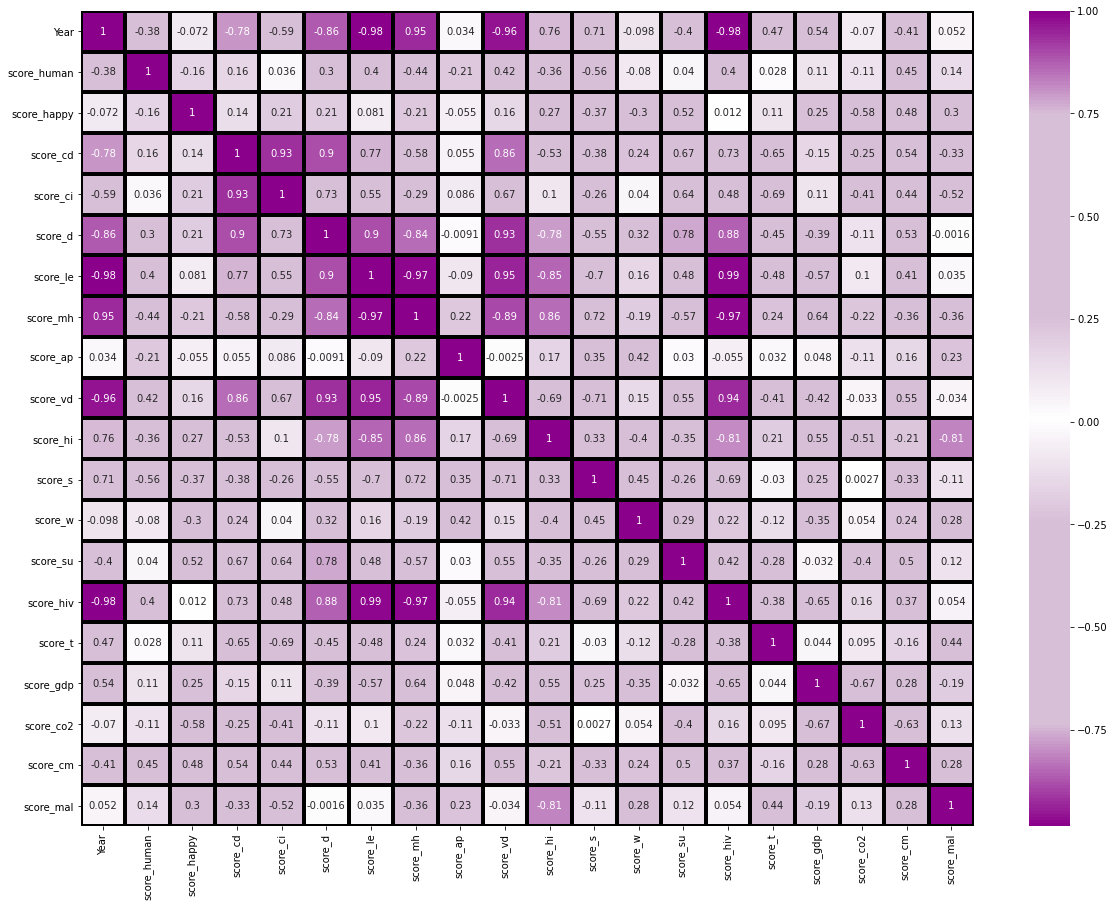

In [37]:
plt.figure(figsize = (20,15))

cmap = LinearSegmentedColormap.from_list(
    name='test', 
    colors=['darkmagenta','thistle','thistle','thistle','white','thistle','thistle','thistle','darkmagenta']
)
_=sns.heatmap(df_merged.corr(), annot=True,cmap=cmap,linewidths=3, linecolor='black')

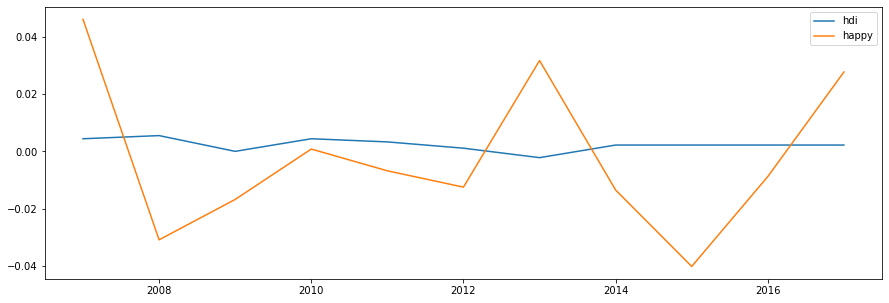

In [25]:
plt.figure(figsize = (15,5))
plt.plot(df_merged['Year'],df_merged['score_human'], label = 'hdi')
#plt.plot(df_merged['Year'],df_merged['score_le'],label = 'life')
plt.plot(df_merged['Year'],df_merged['score_happy'],label = 'happy')
plt.legend()

In [26]:
df_merged

,Entity,Year,score_human,score_happy,score_cd,score_ci,score_d,score_le,score_mh,score_ap,score_vd,score_hi,score_s,score_w,score_su,score_hiv,score_t,score_gdp,score_co2,score_cm,score_mal
11,United States,2017,0.0022,0.0277,0.0047,0.0029,0.0029,-0.0003,NaN,0.0010,0.0278,NaN,-0.0122,-0.0141,-0.0004,0.0582,-0.0409,0.0187,-0.0073,-0.0149,-0.0070
10,United States,2016,0.0022,-0.0088,0.0151,0.0064,0.0140,-0.0003,-0.0084,-0.0580,0.0472,NaN,-0.0415,-0.0335,0.0269,0.0531,-0.0380,0.0081,-0.0222,-0.0147,-0.0209
9,United States,2015,0.0022,-0.0402,-0.0039,0.0010,0.0078,-0.0002,-0.0107,-0.0156,0.0161,NaN,-0.0364,-0.0243,0.0256,0.0467,-0.0352,0.0179,-0.0268,-0.0145,0.0280
8,United States,2014,0.0022,-0.0135,-0.0063,-0.0008,0.0027,0.0002,-0.0085,-0.0475,-0.0013,0.0334,-0.0349,-0.0253,0.0128,0.0405,-0.0324,0.0157,0.0086,-0.0143,0.0342
7,United States,2013,-0.0022,0.0317,-0.0110,-0.0021,-0.0001,0.0006,-0.0086,-0.0318,0.0037,0.0248,-0.0298,-0.0186,0.0035,0.0320,-0.0289,0.0093,0.0273,-0.0141,0.0238
6,United States,2012,0.0011,-0.0125,-0.0144,-0.0029,-0.0037,0.0011,-0.0057,-0.0604,-0.0228,0.0036,-0.0251,-0.0197,0.0041,0.0226,-0.0250,0.0145,-0.0355,-0.0139,0.0134
5,United States,2011,0.0033,-0.0068,-0.0072,-0.0002,0.0010,0.0016,-0.0038,0.0191,-0.0153,0.0072,0.0025,0.0085,0.0170,0.0130,-0.0214,0.0083,-0.0233,-0.0137,0.0266
4,United States,2010,0.0044,0.0008,-0.0243,-0.0035,-0.0138,0.0021,-0.0022,-0.0397,-0.0565,-0.0024,-0.0290,-0.0762,-0.0077,-0.0073,-0.0235,0.0168,0.0377,-0.0267,0.0037
3,United States,2009,0.0000,-0.0168,-0.0129,0.0008,-0.0096,0.0024,0.0009,-0.0290,-0.0529,-0.0083,-0.0176,-0.0654,0.0064,-0.0261,-0.0302,-0.0363,-0.0741,-0.0132,0.0007
2,United States,2008,0.0055,-0.0309,-0.0112,0.0000,-0.0092,0.0026,-0.0002,-0.0179,-0.0568,-0.0012,0.0297,-0.0232,0.0075,-0.0322,-0.0331,-0.0123,-0.0323,-0.0130,0.0131


# Transform the dataframe: <br>
    For all data, multiply by the correlation to hdi(score_human)
    If the data shows a decrease but is 'good' (decrease in deaths) reverse the sign.
    Same for 'bad' factors, make sure they are negative.

In [27]:
df_merged.columns

Index(['Entity', 'Year', 'score_human', 'score_happy', 'score_cd', 'score_ci',
       'score_d', 'score_le', 'score_mh', 'score_ap', 'score_vd', 'score_hi',
       'score_s', 'score_w', 'score_su', 'score_hiv', 'score_t', 'score_gdp',
       'score_co2', 'score_cm', 'score_mal'],
      dtype='object')

In [28]:
df_merged['score_cd'] = df_merged['score_cd'] *-1
df_merged['score_ci'] = df_merged['score_ci'] *-1
df_merged['score_d'] = df_merged['score_d'] *-1
df_merged['score_mh'] = df_merged['score_mh'] *-1
df_merged['score_ap'] = df_merged['score_ap'] *-1
df_merged['score_vd'] = df_merged['score_vd'] *-1
df_merged['score_s'] = df_merged['score_s'] *-1
df_merged['score_w'] = df_merged['score_w'] *-1
df_merged['score_su'] = df_merged['score_su'] *-1
df_merged['score_hiv'] = df_merged['score_hiv'] *-1
df_merged['score_t'] = df_merged['score_t'] *-1
df_merged['score_co2'] = df_merged['score_co2'] *-1
df_merged['score_cm'] = df_merged['score_cm'] *-1
df_merged['score_mal'] = df_merged['score_mal'] *-1

In [29]:
#make dfs for storage
score_cd = []
score_ci = []
score_d = []
score_le = []
score_mh = []
score_ap = []
score_vd = []
score_hi = []
score_s = []
score_w = []
score_su = []
score_hiv = []
score_t = []
score_gdp = []
score_co2 = []
score_cm = []
score_mal = []
#organize dfs in a dictionary
names_dic = { 3 : score_cd, 
              4 : score_ci, 
              5 : score_d, 
              6 : score_le,
              7 : score_mh,
              8 : score_ap, 
              9 : score_vd, 
              10 : score_hi, 
              11 : score_s,
              12 : score_w,
              13 : score_su, 
              14 : score_hiv, 
              15 : score_t,
              16 : score_gdp,
              17 : score_co2,
              18 : score_cm,
              19 : score_mal,
            }

#make variables for the loop
col_count = len(df_merged.columns)-4
col = 4
corr_col = 3
dic_ind = 3
columns_list = list(df_merged.columns)

In [30]:
for x in list(names_dic)[:]:  
    #will put the weight into the first dictionary
    for i in df_merged.iloc[:,col]:
        corr = df_corr.iloc[1][corr_col]
        num = i * 1
        names_dic[dic_ind].append(num)
        
    col +=1
    corr_col += 1
    dic_ind += 1
names_dic

{3: [-0.0047,
  -0.0151,
  0.0039,
  0.0063,
  0.011,
  0.0144,
  0.0072,
  0.0243,
  0.0129,
  0.0112,
  0.019,
  nan],
 4: [-0.0029,
  -0.0064,
  -0.001,
  0.0008,
  0.0021,
  0.0029,
  0.0002,
  0.0035,
  -0.0008,
  -0.0,
  0.0023,
  nan],
 5: [-0.0029,
  -0.014,
  -0.0078,
  -0.0027,
  0.0001,
  0.0037,
  -0.001,
  0.0138,
  0.0096,
  0.0092,
  0.0111,
  nan],
 6: [-0.0003,
  -0.0003,
  -0.0002,
  0.0002,
  0.0006,
  0.0011,
  0.0016,
  0.0021,
  0.0024,
  0.0026,
  0.0027,
  nan],
 7: [nan,
  0.0084,
  0.0107,
  0.0085,
  0.0086,
  0.0057,
  0.0038,
  0.0022,
  -0.0009,
  0.0002,
  -0.0003,
  nan],
 8: [-0.001,
  0.058,
  0.0156,
  0.0475,
  0.0318,
  0.0604,
  -0.0191,
  0.0397,
  0.029,
  0.0179,
  0.0309,
  nan],
 9: [-0.0278,
  -0.0472,
  -0.0161,
  0.0013,
  -0.0037,
  0.0228,
  0.0153,
  0.0565,
  0.0529,
  0.0568,
  0.0914,
  nan],
 10: [nan,
  nan,
  nan,
  0.0334,
  0.0248,
  0.0036,
  0.0072,
  -0.0024,
  -0.0083,
  -0.0012,
  0.0059,
  nan],
 11: [0.0122,
  0.0415,
  0.

ci = []
col = 5
corr_row = 4
while col <= col_count:
    for i in df_merged.iloc[:,col]:
        corr = df_corr.iloc[1][corr_row]
        num = i * corr 
        ci.append(num)
        col += 1
print(ci)

for i in df_merged.columns[4:]:
    while col <= col_count:
        for i in df_merged.iloc[:,col]:
            corr = df_corr.iloc[1][corr_row]
            num = i * corr 
            compiled.append(num)
            col += 1
    col = 5
    corr_row = 4
print(compiled)

In [31]:
#set back to df
second = pd.DataFrame(data = names_dic)
second.columns = ['weighted_cd','weighted_ci','weighted_d','weighted_le','weighted_mh','weighted_ap','weighted_vd','weighted_hi','weighted_s','weighted_w','weighted_su','weighted_hiv','weighted_t','weighted_gdp','weighted_co2','weighted_cm','weighted_mal']
second['year'] = [2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006]
final = df_merged.merge(second, how = 'left', left_on ='Year', right_on = 'year')
final['total_weighted'] = final['weighted_cd'] + final['weighted_ci'] + final['weighted_d'] + final['weighted_le'] + final['weighted_ap'] + final['weighted_vd'] + final['weighted_s'] + final['weighted_w'] + final['weighted_su'] + final['weighted_hiv'] + final['weighted_t']+ final['weighted_gdp']+ final['weighted_co2']+ final['weighted_cm']+ final['weighted_mal']
final

,Entity,Year,score_human,score_happy,score_cd,score_ci,score_d,score_le,score_mh,score_ap,score_vd,score_hi,score_s,score_w,score_su,score_hiv,score_t,score_gdp,score_co2,score_cm,score_mal,weighted_cd,weighted_ci,weighted_d,weighted_le,weighted_mh,weighted_ap,weighted_vd,weighted_hi,weighted_s,weighted_w,weighted_su,weighted_hiv,weighted_t,weighted_gdp,weighted_co2,weighted_cm,weighted_mal,year,total_weighted
0,United States,2017,0.0022,0.0277,-0.0047,-0.0029,-0.0029,-0.0003,NaN,-0.0010,-0.0278,NaN,0.0122,0.0141,0.0004,-0.0582,0.0409,0.0187,0.0073,0.0149,0.0070,-0.0047,-0.0029,-0.0029,-0.0003,NaN,-0.0010,-0.0278,NaN,0.0122,0.0141,0.0004,-0.0582,0.0409,0.0187,0.0073,0.0149,0.0070,2017,0.0177
1,United States,2016,0.0022,-0.0088,-0.0151,-0.0064,-0.0140,-0.0003,0.0084,0.0580,-0.0472,NaN,0.0415,0.0335,-0.0269,-0.0531,0.0380,0.0081,0.0222,0.0147,0.0209,-0.0151,-0.0064,-0.0140,-0.0003,0.0084,0.0580,-0.0472,NaN,0.0415,0.0335,-0.0269,-0.0531,0.0380,0.0081,0.0222,0.0147,0.0209,2016,0.0739
2,United States,2015,0.0022,-0.0402,0.0039,-0.0010,-0.0078,-0.0002,0.0107,0.0156,-0.0161,NaN,0.0364,0.0243,-0.0256,-0.0467,0.0352,0.0179,0.0268,0.0145,-0.0280,0.0039,-0.0010,-0.0078,-0.0002,0.0107,0.0156,-0.0161,NaN,0.0364,0.0243,-0.0256,-0.0467,0.0352,0.0179,0.0268,0.0145,-0.0280,2015,0.0492
3,United States,2014,0.0022,-0.0135,0.0063,0.0008,-0.0027,0.0002,0.0085,0.0475,0.0013,0.0334,0.0349,0.0253,-0.0128,-0.0405,0.0324,0.0157,-0.0086,0.0143,-0.0342,0.0063,0.0008,-0.0027,0.0002,0.0085,0.0475,0.0013,0.0334,0.0349,0.0253,-0.0128,-0.0405,0.0324,0.0157,-0.0086,0.0143,-0.0342,2014,0.0799
4,United States,2013,-0.0022,0.0317,0.0110,0.0021,0.0001,0.0006,0.0086,0.0318,-0.0037,0.0248,0.0298,0.0186,-0.0035,-0.0320,0.0289,0.0093,-0.0273,0.0141,-0.0238,0.0110,0.0021,0.0001,0.0006,0.0086,0.0318,-0.0037,0.0248,0.0298,0.0186,-0.0035,-0.0320,0.0289,0.0093,-0.0273,0.0141,-0.0238,2013,0.0560
5,United States,2012,0.0011,-0.0125,0.0144,0.0029,0.0037,0.0011,0.0057,0.0604,0.0228,0.0036,0.0251,0.0197,-0.0041,-0.0226,0.0250,0.0145,0.0355,0.0139,-0.0134,0.0144,0.0029,0.0037,0.0011,0.0057,0.0604,0.0228,0.0036,0.0251,0.0197,-0.0041,-0.0226,0.0250,0.0145,0.0355,0.0139,-0.0134,2012,0.1989
6,United States,2011,0.0033,-0.0068,0.0072,0.0002,-0.0010,0.0016,0.0038,-0.0191,0.0153,0.0072,-0.0025,-0.0085,-0.0170,-0.0130,0.0214,0.0083,0.0233,0.0137,-0.0266,0.0072,0.0002,-0.0010,0.0016,0.0038,-0.0191,0.0153,0.0072,-0.0025,-0.0085,-0.0170,-0.0130,0.0214,0.0083,0.0233,0.0137,-0.0266,2011,0.0033
7,United States,2010,0.0044,0.0008,0.0243,0.0035,0.0138,0.0021,0.0022,0.0397,0.0565,-0.0024,0.0290,0.0762,0.0077,0.0073,0.0235,0.0168,-0.0377,0.0267,-0.0037,0.0243,0.0035,0.0138,0.0021,0.0022,0.0397,0.0565,-0.0024,0.0290,0.0762,0.0077,0.0073,0.0235,0.0168,-0.0377,0.0267,-0.0037,2010,0.2857
8,United States,2009,0.0000,-0.0168,0.0129,-0.0008,0.0096,0.0024,-0.0009,0.0290,0.0529,-0.0083,0.0176,0.0654,-0.0064,0.0261,0.0302,-0.0363,0.0741,0.0132,-0.0007,0.0129,-0.0008,0.0096,0.0024,-0.0009,0.0290,0.0529,-0.0083,0.0176,0.0654,-0.0064,0.0261,0.0302,-0.0363,0.0741,0.0132,-0.0007,2009,0.2892
9,United States,2008,0.0055,-0.0309,0.0112,-0.0000,0.0092,0.0026,0.0002,0.0179,0.0568,-0.0012,-0.0297,0.0232,-0.0075,0.0322,0.0331,-0.0123,0.0323,0.0130,-0.0131,0.0112,-0.0000,0.0092,0.0026,0.0002,0.0179,0.0568,-0.0012,-0.0297,0.0232,-0.0075,0.0322,0.0331,-0.0123,0.0323,0.0130,-0.0131,2008,0.1689


In [32]:
new1 = pd.DataFrame(data = final.iloc[:,1])
new1['Factor'] = 'Decrease in Cancer Deaths'
new1['Total'] = final.iloc[:,-1]
new1['Score'] = final.iloc[:,17]

new2 = pd.DataFrame(data = final.iloc[:,1])
new2['Factor'] = 'Decrease in Cancer Incidences'
new2['Total'] = final.iloc[:,-1]
new2['Score'] = final.iloc[:,18]

new3 = pd.DataFrame(data = final.iloc[:,1])
new3['Factor'] = 'Decrease in Autism'
new3['Total'] = final.iloc[:,-1]
new3['Score'] = final.iloc[:,19]

new4 = pd.DataFrame(data = final.iloc[:,1])
new4['Factor'] = 'Life Expectancy'
new4['Total'] = final.iloc[:,-1]
new4['Score'] = final.iloc[:,20]

#skip mental health

new5 = pd.DataFrame(data = final.iloc[:,1])
new5['Factor'] = 'Decrease in Air Pollution'
new5['Total'] = final.iloc[:,-1]
new5['Score'] = final.iloc[:,22]

new6 = pd.DataFrame(data = final.iloc[:,1])
new6['Factor'] = 'Decrease in Vaccine Preventable Disease'
new6['Total'] = final.iloc[:,-1]
new6['Score'] = final.iloc[:,23]

#skip health insurance

new7 = pd.DataFrame(data = final.iloc[:,1])
new7['Factor'] = 'Decrease in Suicide'
new7['Total'] = final.iloc[:,-1]
new7['Score'] = final.iloc[:,25]

new8 = pd.DataFrame(data = final.iloc[:,1])
new8['Factor'] = 'Decrease in Death by Unsafe Drinking Water'
new8['Total'] = final.iloc[:,-1]
new8['Score'] = final.iloc[:,26]

new9 = pd.DataFrame(data = final.iloc[:,1])
new9['Factor'] = 'Decrease in Death by Unsanitary Conditions'
new9['Total'] = final.iloc[:,-1]
new9['Score'] = final.iloc[:,27]

new10 = pd.DataFrame(data = final.iloc[:,1])
new10['Factor'] = 'Decrease in HIV Incidences'
new10['Total'] = final.iloc[:,-1]
new10['Score'] = final.iloc[:,28]

new11 = pd.DataFrame(data = final.iloc[:,1])
new11['Factor'] = 'Decrease in TB Incidences'
new11['Total'] = final.iloc[:,-1]
new11['Score'] = final.iloc[:,29]

new12 = pd.DataFrame(data = final.iloc[:,1])
new12['Factor'] = 'GDP'
new12['Total'] = final.iloc[:,-1]
new12['Score'] = final.iloc[:,30]

new13 = pd.DataFrame(data = final.iloc[:,1])
new13['Factor'] = 'Decrease in CO2 Emmisions'
new13['Total'] = final.iloc[:,-1]
new13['Score'] = final.iloc[:,30]

new14 = pd.DataFrame(data = final.iloc[:,1])
new14['Factor'] = 'Decrease in Child Mortality'
new14['Total'] = final.iloc[:,-1]
new14['Score'] = final.iloc[:,30]

new15 = pd.DataFrame(data = final.iloc[:,1])
new15['Factor'] = 'Decrease in Malnutrition'
new15['Total'] = final.iloc[:,-1]
new15['Score'] = final.iloc[:,30]


In [33]:
new_list = [new2, new3, new4, new5,new6, new7, new8, new5,new9, new10, new11, new12, new13, new14, new15]
all = new1.append(new_list, ignore_index = True)
all.tail(60)


,Year,Factor,Total,Score
132,2017,Decrease in TB Incidences,0.0177,0.0122
133,2016,Decrease in TB Incidences,0.0739,0.0415
134,2015,Decrease in TB Incidences,0.0492,0.0364
135,2014,Decrease in TB Incidences,0.0799,0.0349
136,2013,Decrease in TB Incidences,0.0560,0.0298
137,2012,Decrease in TB Incidences,0.1989,0.0251
138,2011,Decrease in TB Incidences,0.0033,-0.0025
139,2010,Decrease in TB Incidences,0.2857,0.0290
140,2009,Decrease in TB Incidences,0.2892,0.0176
141,2008,Decrease in TB Incidences,0.1689,-0.0297


In [34]:
finalyr = final.set_index('Year').T
finalyr

Year,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
Entity,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
score_human,0.0022,0.0022,0.0022,0.0022,-0.0022,0.0011,0.0033,0.0044,0.0,0.0055,0.0044,NaN
score_happy,0.0277,-0.0088,-0.0402,-0.0135,0.0317,-0.0125,-0.0068,0.0008,-0.0168,-0.0309,0.0461,NaN
score_cd,-0.0047,-0.0151,0.0039,0.0063,0.011,0.0144,0.0072,0.0243,0.0129,0.0112,0.019,NaN
score_ci,-0.0029,-0.0064,-0.001,0.0008,0.0021,0.0029,0.0002,0.0035,-0.0008,-0.0,0.0023,NaN
score_d,-0.0029,-0.014,-0.0078,-0.0027,0.0001,0.0037,-0.001,0.0138,0.0096,0.0092,0.0111,NaN
score_le,-0.0003,-0.0003,-0.0002,0.0002,0.0006,0.0011,0.0016,0.0021,0.0024,0.0026,0.0027,NaN
score_mh,NaN,0.0084,0.0107,0.0085,0.0086,0.0057,0.0038,0.0022,-0.0009,0.0002,-0.0003,NaN
score_ap,-0.001,0.058,0.0156,0.0475,0.0318,0.0604,-0.0191,0.0397,0.029,0.0179,0.0309,NaN
score_vd,-0.0278,-0.0472,-0.0161,0.0013,-0.0037,0.0228,0.0153,0.0565,0.0529,0.0568,0.0914,NaN


In [35]:
final.to_csv('by_factor.csv')
finalyr.to_csv('by_yr.csv')
all.to_csv('all.csv')
